In [75]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Modelo IS-LM con Tasa de Interés Exógena $(r)$ fijada por el Banco Central:

## Ecuaciones

- Ecuación de la IS: 

Partiendo de:

$$ Y = C + I + G + X - M $$

donde

$$ C = C_0 + b(1-t)Y $$

$$ I = I_0 - hr $$

$$ G = G_0 $$

$$ X = X_0 $$

$$ M = mY $$

Reemplazando:

$$ Y = C_0 + b(1-t)Y + I_0 - hr + G_0 + X_0 - mY $$

La ecuación de la IS es en función de $Y$ es:

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_o + I_o + G_o + X_o - hr) $$

o,

$$ Y = \frac{1}{B_1} (B_0) $$

Donde $ B_0 = C_o + I_o + G_o + X_o - hr $ y $ B_1 = 1 - (b - m)(1 - t) $

- Ecuación de la LM:

$$ \frac{M_o^s}{P_0} = kY - jr $$

Ahora $M^s$ es la variable endogena, por eso escribimos la LM En función de $(M^s)$:

$$ M^s = P_0(kY - jr) $$

## Equilibrio IS-LM con $r$ exógena

- Ingreso de equilibrio: es igual a la ecuación de la IS

$$ Y^e = \frac{1}{1 - (b - m)(1 - t)} (C_o + I_o + G_o + X_o - hr) $$

- Masa monetaria: reemplazamos $Y$ en $M_s$:

$$ M^e_s = P_0(kY - jr) $$

$$ M^e_s = (\frac{B_0}{B_1})P_0k - P_0jr $$


$$ M^e_s = P_0k(\frac{1}{1 - (b - m)(1 - t)} (C_o + I_o + G_o + X_o - hr)) - P_0jr $$

## Curva IS

In [76]:
#--------------------------------------------------

# Curva IS

r_size = 100 

Co = 13
b = 0.7
t = 0.25
Io = 6.4
Go = 5
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)

# Ecuación

def IS_CB(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1 - (b - m)*(1 - t)))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB = IS_CB(Co, b, t, Io, h, Xo, m, Go)

## Curva LM

In [3]:
#--------------------------------------------------
# Curva LM
    
# Parámetros

Y_size = 100

P = 3.5
k = 1.76
j = 3
r = 15

Y = np.arange(Y_size)

# Ecuación

def LM_CB(Y, P, k, j, r):
    LM_CB = P*(k*Y - j*r)
    return LM_CB

LM_CB = LM_CB(Y, P, k, j, r)

## Funcion para encontrar el cruce de rectas

In [4]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


### Encontrar puntos de cruce

In [5]:
r_ec = np.full((100), 15)

# coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] # DA, coordenada inicio
B = [IS_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec[0], Y[0]] # L_45, coordenada inicio
D = [r_ec[-1], Y[-1]] # L_45, coordenada fin

# creación de intersección

intersec_1 = line_intersection((A, B), (C, D))
intersec_1 # (y,x)

(15.000000000000002, 49.25)

## Gráfico del modelo IS-LM-PM

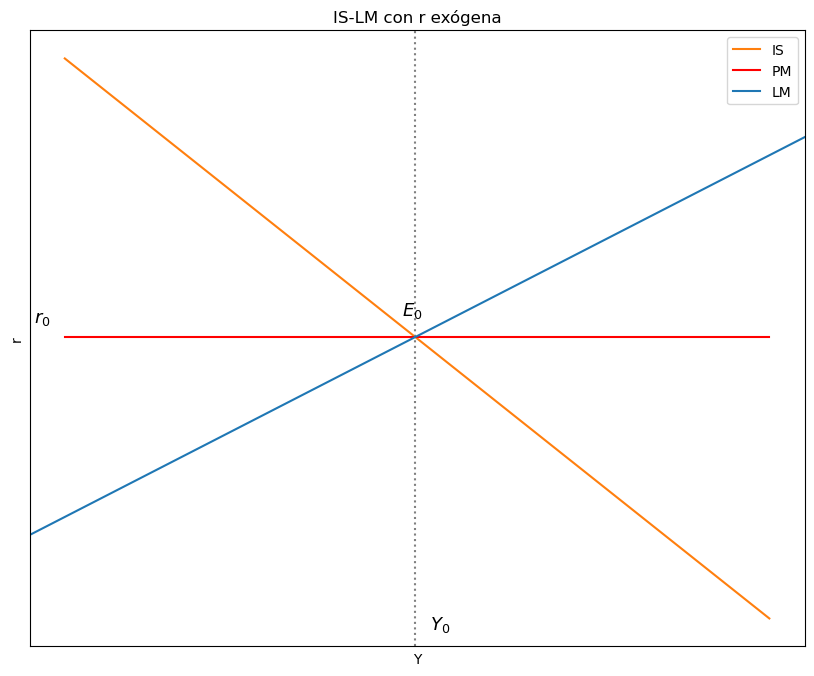

In [13]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(IS_CB, label = "IS", color = "C1") #IS
ax.plot(r_ec, color = "red", label ="PM") #r: tasa de interés

plt.axvline(intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
plt.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.text(min(IS_CB), intersec_1[0]+1, '$r_0$', fontsize = 13, color = 'black')
ax.text(intersec_1[1]+2,intersec_1[0]-20, '$Y_0$', fontsize = 13, color = 'black')
ax.text(intersec_1[1]-1.8,intersec_1[0]+1.5, '$E_0$', fontsize = 13, color = 'black')

ax.set(title="IS-LM con r exógena", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


## Estática comparativa

In [22]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1 = symbols('Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1')

# # Beta_0 y beta_1
# beta_0 = (Co + Io + Go + Xo - h*r)
# beta_1 = (1-(b-m)*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))
Ms_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))*(P*k) - (P*j*r)

### Incremento tasa de interés $(r)$

- Matemática:

In [23]:
df_Y_eq_r = diff(Y_eq, r)
print("El Diferencial del Producto con respecto al diferencial de la tasa de interés = ", df_Y_eq_r)

El Diferencial del Producto con respecto al diferencial de la tasa de interés =  -h/(-(1 - t)*(b - m) + 1)


¿$∆Y$ sabiendo que $∆r > 0$?

$$ \frac{∆Y}{∆r} = (-) $$

$$ \frac{∆Y}{(+)} = (-) $$

$$ ∆Y = (-) $$



In [24]:
df_Ms_eq_r = diff(Ms_eq, r)
print("El Diferencial de la Masa Monetaria con respecto al diferencial de la tasa de interés = ", df_Ms_eq_r)

El Diferencial de la Masa Monetaria con respecto al diferencial de la tasa de interés =  -P*h*k/(-(1 - t)*(b - m) + 1) - P*j


¿$∆M^s$ sabiendo que $∆r > 0$?

$$ \frac{∆M^s}{∆r} = (-) $$

$$ \frac{∆M^s}{(+)} = (-) $$

$$ ∆M^s = (-) $$



- Intuición:

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

$$ r↑ → M^d<M^s → M^s↓ $$


- Gráfico:

In [14]:
#--------------------------------------------------
    # Curva IS

r_size = 100 

Co = 13
b = 0.7
t = 0.25
Io = 6.4
Go = 5
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)

# Ecuación

def IS_CB(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1 - (b - m)*(1 - t)))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB = IS_CB(Co, b, t, Io, h, Xo, m, Go)


#--------------------------------------------------
    # Curva LM
    
# Parámetros

Y_size = 100

P = 3.5
k = 1.76
j = 3
r = 15

Y = np.arange(Y_size)

# Ecuación

def LM_CB(Y, P, k, j, r):
    LM_CB = P*(k*Y - j*r)
    return LM_CB

LM_CB = LM_CB(Y, P, k, j, r)

#---------------------------------------------------
    # Nueva LM

r = 20 

def LM_CB_2(Y, P, k, j, r):
    LM_CB_2 = P*(k*Y - j*r)
    return LM_CB_2

LM_CB_2 = LM_CB_2(Y, P, k, j, r)

In [15]:
r_ec = np.full((100), 15)

    # coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] 
B = [IS_CB[-1], Y[-1]] 

C = [r_ec[0], Y[0]] 
D = [r_ec[-1], Y[-1]]

    # creación de intersección

intersec_1 = line_intersection((A, B), (C, D))
intersec_1 # (y,x)

(15.000000000000002, 49.25)

In [16]:
r_ec_2 = np.full((100), 20)

    # coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] 
B = [IS_CB[-1], Y[-1]] 

C = [r_ec_2[0], Y[0]] 
D = [r_ec_2[-1], Y[-1]] 

    # creación de intersección

intersec_2 = line_intersection((A, B), (C, D))
intersec_2 # (y,x)

(20.0, 36.333333333333336)

In [17]:
P_Ms0 = P*(k*intersec_1[1] - j*r)
P_Ms0

93.38000000000002

In [18]:
P_Ms1 = P*(k*intersec_2[1] - j*r)
P_Ms1

13.813333333333354

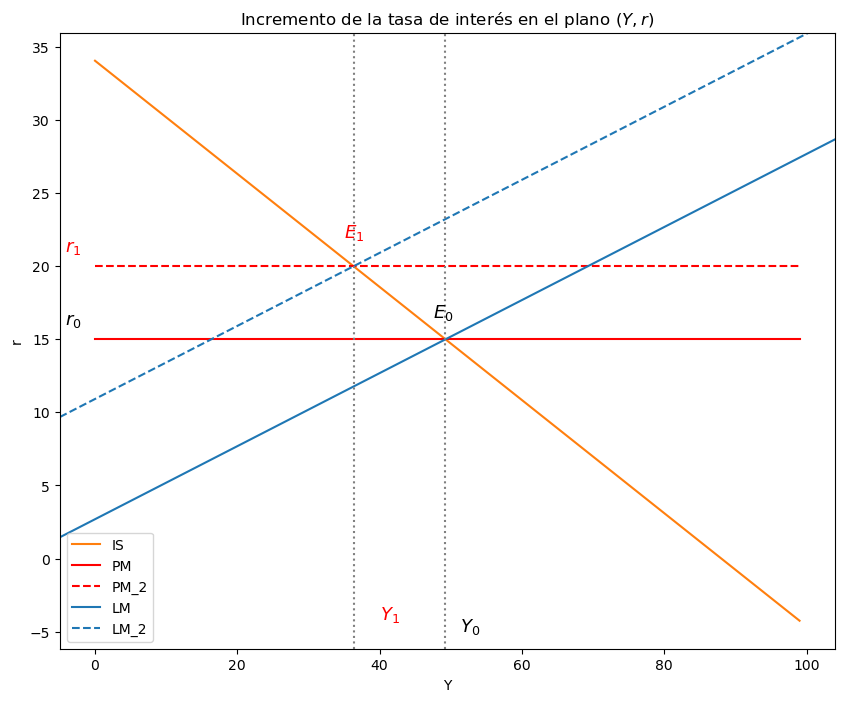

In [28]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(IS_CB, label = "IS", color = "C1") #IS
ax.plot(r_ec, color = "red", label ="PM") #r: tasa de interés
ax.plot(r_ec_2, color = "red", label ="PM_2", linestyle = 'dashed') #r: tasa de interés

plt.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')
plt.axline((intersec_2[1], intersec_2[0]), slope=0.25, color="C0", label = 'LM_2', linestyle = 'dashed')

plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
plt.axvline(x=intersec_2[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")

ax.text(min(IS_CB), intersec_1[0]+1, '$r_0$', fontsize = 13, color = 'black')
ax.text(intersec_1[1]+2,intersec_1[0]-20, '$Y_0$', fontsize = 13, color = 'black')
ax.text(intersec_1[1]-1.8,intersec_1[0]+1.5, '$E_0$', fontsize = 13, color = 'black')

ax.text(min(IS_CB), P_Ms1+7.19, '$r_1$', fontsize = 13, color = 'red')
ax.text(P_Ms1+26.19,P_Ms1-18, '$Y_1$', fontsize = 13, color = 'red')
ax.text(intersec_2[1]-1.3, P_Ms1+8.19, '$E_1$', fontsize = 13, color = 'red')

ax.set(title="Incremento de la tasa de interés en el plano $(Y, r)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


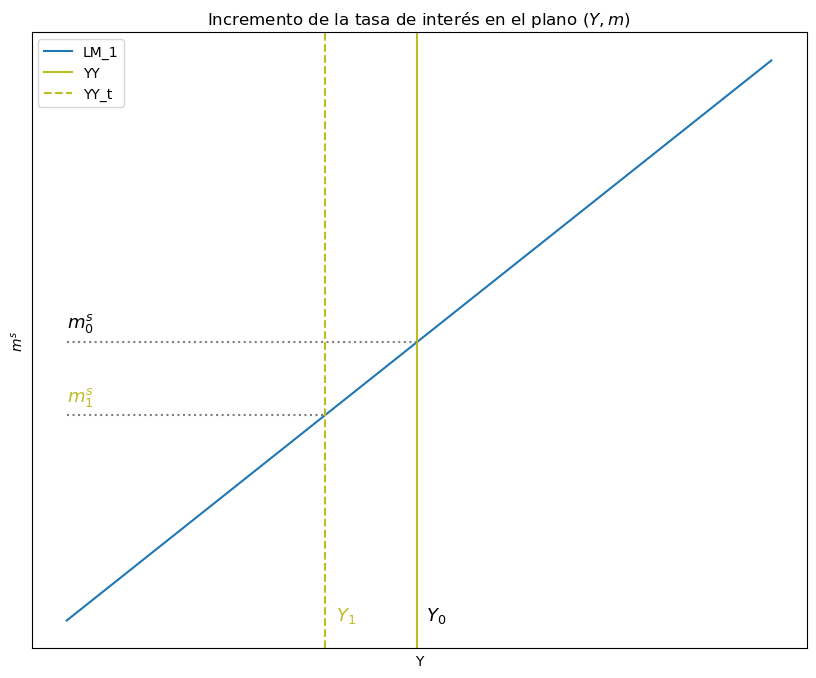

In [44]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, LM_CB_2, label = "LM_1", color = "C0") #LM

#Vertical
plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')
plt.axvline(x=intersec_2[1], ymin= 0, ymax= 1, color = "C8", label = 'YY_t', linestyle = 'dashed')

#Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), intersec_1[1]],[P_Ms0, P_Ms0], linestyle=":", color = "grey")
ax.plot([min(Y),intersec_2[1]], [P_Ms1, P_Ms1], linestyle=":", color = "grey")

#Agregamos texto
ax.text(min(Y),intersec_2[1]*3, '$m_0^s$', fontsize = 13, color = 'black')
ax.text(intersec_1[1]+1.25, min(LM_CB_2), '$Y_0$', fontsize = 13, color = 'black')

ax.text(min(Y),intersec_1[1]-20, '$m_1^s$', fontsize = 13, color = 'C8')
ax.text(intersec_2[1]+1.5,min(LM_CB_2), '$Y_1$', fontsize = 13, color = 'C8')

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título y leyenda
ax.set(title="Incremento de la tasa de interés en el plano $(Y, m)$", xlabel= 'Y', ylabel= '$m^s$')
ax.legend()

plt.show()

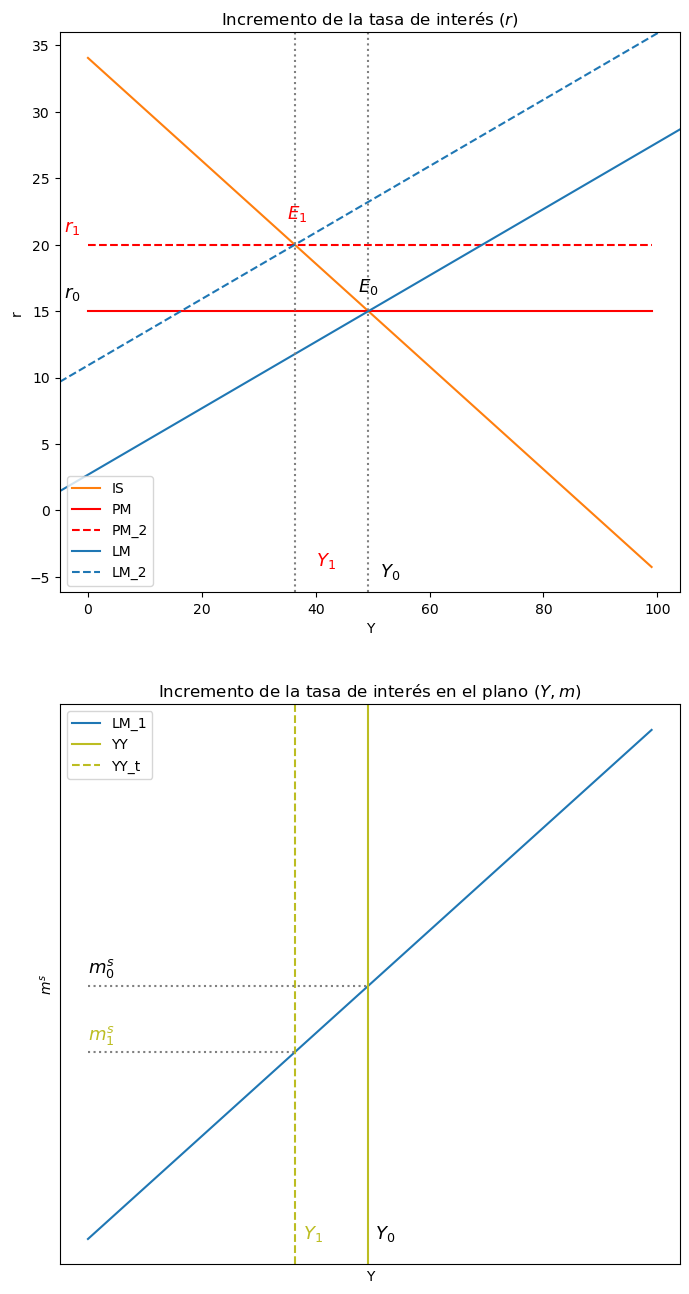

In [49]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # IS_PM

# Curvas a graficar
ax1.plot(IS_CB, label = "IS", color = "C1") #IS
ax1.plot(r_ec, color = "red", label ="PM") #r: tasa de interés
ax1.plot(r_ec_2, color = "red", label ="PM_2", linestyle = 'dashed') #r: tasa de interés

ax1.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')
ax1.axline((intersec_2[1], intersec_2[0]), slope=0.25, color="C0", label = 'LM_2', linestyle = 'dashed')

ax1.axvline(x=intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=intersec_2[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")


ax1.text(min(IS_CB), intersec_1[0]+1, '$r_0$', fontsize = 13, color = 'black')
ax1.text(intersec_1[1]+2,intersec_1[0]-20, '$Y_0$', fontsize = 13, color = 'black')
ax1.text(intersec_1[1]-1.8,intersec_1[0]+1.5, '$E_0$', fontsize = 13, color = 'black')

ax1.text(min(IS_CB), P_Ms1+7.19, '$r_1$', fontsize = 13, color = 'red')
ax1.text(P_Ms1+26.19,P_Ms1-18, '$Y_1$', fontsize = 13, color = 'red')
ax1.text(intersec_2[1]-1.3, P_Ms1+8.19, '$E_1$', fontsize = 13, color = 'red')

ax1.set(title="Incremento de la tasa de interés $(r)$", xlabel= 'Y', ylabel= 'r')
ax1.legend()


#---------------------------------
    # YY-MM
    
# Curvas a graficar
ax2.plot(Y, LM_CB_2, label = "LM_1", color = "C0") #LM

#Vertical
plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')
plt.axvline(x=intersec_2[1], ymin= 0, ymax= 1, color = "C8", label = 'YY_t', linestyle = 'dashed')
#Horizontal
ax2.plot([min(Y), intersec_1[1]],[P_Ms0, P_Ms0], linestyle=":", color = "grey")
ax2.plot([min(Y),intersec_2[1]], [P_Ms1, P_Ms1], linestyle=":", color = "grey")

#Agregamos texto
ax2.text(min(Y),intersec_2[1]*3, '$m_0^s$', fontsize = 13, color = 'black')
ax2.text(intersec_1[1]+1.25, min(LM_CB_2), '$Y_0$', fontsize = 13, color = 'black')

ax2.text(min(Y),intersec_1[1]-20, '$m_1^s$', fontsize = 13, color = 'C8')
ax2.text(intersec_2[1]+1.5,min(LM_CB_2), '$Y_1$', fontsize = 13, color = 'C8')

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.set(title="Incremento de la tasa de interés en el plano $(Y, m)$", xlabel= 'Y', ylabel= '$m^s$')
ax2.legend()

plt.show()


In [64]:
#--------------------------------------------------
    # Curva LM
    
# Parámetros

Y_size = 100

P = 3.5
k = 1.76
j = 3
r = 20

Y = np.arange(Y_size)

# Ecuación

def LM_CB(Y, P, k, j, r):
    LM_CB = P*(k*Y - j*r)
    return LM_CB

LM_CB_2 = LM_CB(Y, P, k, j, r)

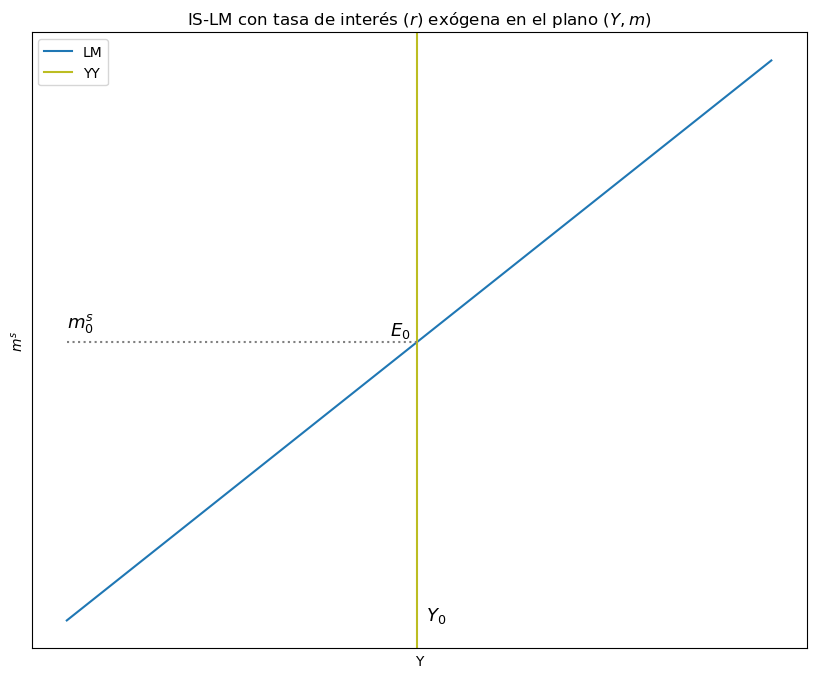

In [65]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y,LM_CB_2, label = "LM", color = "C0") #IS
plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')

#Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y),intersec_1[1]], [P_Ms0, P_Ms0], linestyle=":", color = "grey")

#Agregamos texto
ax.text(min(Y),intersec_2[1]*3, '$m_0^s$', fontsize = 13, color = 'black')
ax.text(intersec_1[1]+1.25, min(LM_CB_2), '$Y_0$', fontsize = 13, color = 'black')
ax.text(P_Ms0-48, P_Ms0+7, '$E_0$', fontsize = 13, color = 'black')

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())
# Título y leyenda
ax.set(title="IS-LM con tasa de interés $(r)$ exógena en el plano $(Y, m)$", xlabel= 'Y', ylabel= '$m^s$')
ax.legend()

plt.show()


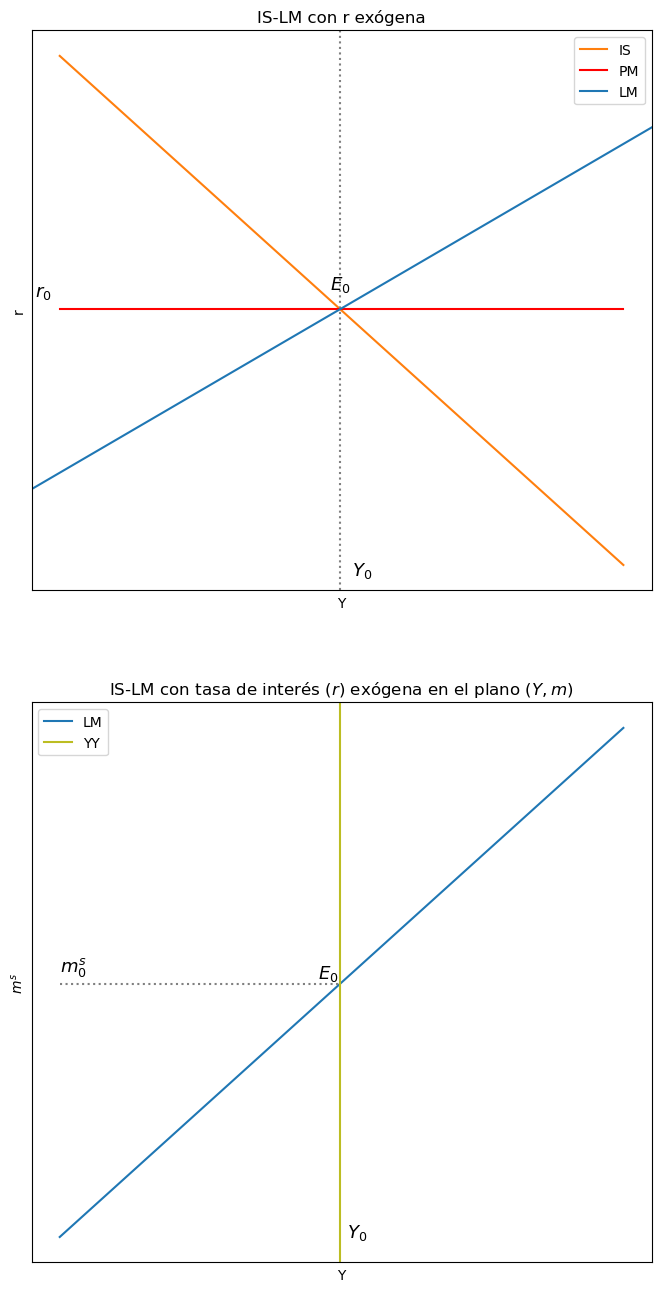

In [73]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # IS_PM

# Curvas a graficar
ax1.plot(IS_CB, label = "IS", color = "C1") #IS
ax1.plot(r_ec, color = "red", label ="PM") #r: tasa de interés

ax1.axvline(intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.text(min(IS_CB), intersec_1[0]+1, '$r_0$', fontsize = 13, color = 'black')
ax1.text(intersec_1[1]+2,intersec_1[0]-20, '$Y_0$', fontsize = 13, color = 'black')
ax1.text(intersec_1[1]-1.8,intersec_1[0]+1.5, '$E_0$', fontsize = 13, color = 'black')

ax1.set(title="IS-LM con r exógena", xlabel= 'Y', ylabel= 'r')
ax1.legend()


#---------------------------------
    # YY-MM
    
# Curvas a graficar
ax2.plot(Y,LM_CB_2, label = "LM", color = "C0") #IS
plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')

#Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax2.plot([min(Y),intersec_1[1]], [P_Ms0, P_Ms0], linestyle=":", color = "grey")

#Agregamos texto
ax2.text(min(Y),intersec_2[1]*3, '$m_0^s$', fontsize = 13, color = 'black')
ax2.text(intersec_1[1]+1.25, min(LM_CB_2), '$Y_0$', fontsize = 13, color = 'black')
ax2.text(P_Ms0-48, P_Ms0+7, '$E_0$', fontsize = 13, color = 'black')

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())
# Título y leyenda
ax2.set(title="IS-LM con tasa de interés $(r)$ exógena en el plano $(Y, m)$", xlabel= 'Y', ylabel= '$m^s$')
ax2.legend()

plt.show()


In [74]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1 = symbols('Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1')

# # Beta_0 y beta_1
# beta_0 = (Co + Io + Go + Xo - h*r)
# beta_1 = (1-(b-m)*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))
Ms_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))*(P*k) - (P*j*r)